In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import math

In [141]:
data = pd.read_csv('../source_data/diabetes_dataset.csv')
data

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


In [142]:
NUMERICAL_FEATURES = ['physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day',
                      'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total',
                      'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 
                      'hba1c', 'diabetes_risk_score']

In [143]:
data = data.rename(columns={'diagnosed_diabetes': 'target'})

#### Label encoding for the binary gender feature and one-hot encoding for all other categorical features.

One-hot encoding is applied to avoid introducing artificial ordinal relationships between multi-class categorical variables.

---

In [144]:
# Label encoding is appropriate for the gender feature since it contains only two categories.
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

In [145]:
# One-hot encoding is used for multi-class categorical features to prepare the data for modeling.
categorical_cols = ['ethnicity', 'education_level', 'income_level',
                    'employment_status', 'smoking_status', 'diabetes_stage', 'alcohol_consumption_per_week']

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [146]:
data = data.astype(float)

### Numerical Feature Distribution and Skewness Analysis

---

In [147]:
# Skewness correction is applied when a numerical feature shows substantial asymmetry in its distribution, 
# typically caused by a long right tail with a few very large values.
# link: https://medium.com/@samiraalipour/understanding-and-handling-skewness-in-machine-6e8fc8b15382
data[NUMERICAL_FEATURES].skew().sort_values(ascending=False)

physical_activity_minutes_per_week    1.389970
diabetes_risk_score                   0.514610
insulin_level                         0.422475
ldl_cholesterol                       0.319901
systolic_bp                           0.218756
triglycerides                         0.104035
screen_time_hours_per_day             0.082573
glucose_fasting                       0.046037
cholesterol_total                     0.033572
hba1c                                 0.031969
glucose_postprandial                  0.027832
diastolic_bp                          0.007074
bmi                                   0.006296
waist_to_hip_ratio                    0.005584
hdl_cholesterol                      -0.002626
sleep_hours_per_day                  -0.012613
heart_rate                           -0.016811
diet_score                           -0.070251
dtype: float64

In [148]:
skew_ranges = pd.DataFrame({
    'Skewness Range': ['0.00 – 0.50', 
                       '0.50 – 1.00', 
                       '> 1.00'],
    
    'Interpretation': ['Symmetric or lightly skewed',
                       'Moderately skewed',
                       'Highly skewed (right-tailed)'],
    
    'Recommended Action': ['No transformation required',
                           'Optional transformation',
                           'Log-transformation recommended']
})

skew_ranges

,Skewness Range,Interpretation,Recommended Action
0,0.00 – 0.50,Symmetric or lightly skewed,No transformation required
1,0.50 – 1.00,Moderately skewed,Optional transformation
2,> 1.00,Highly skewed (right-tailed),Log-transformation recommended


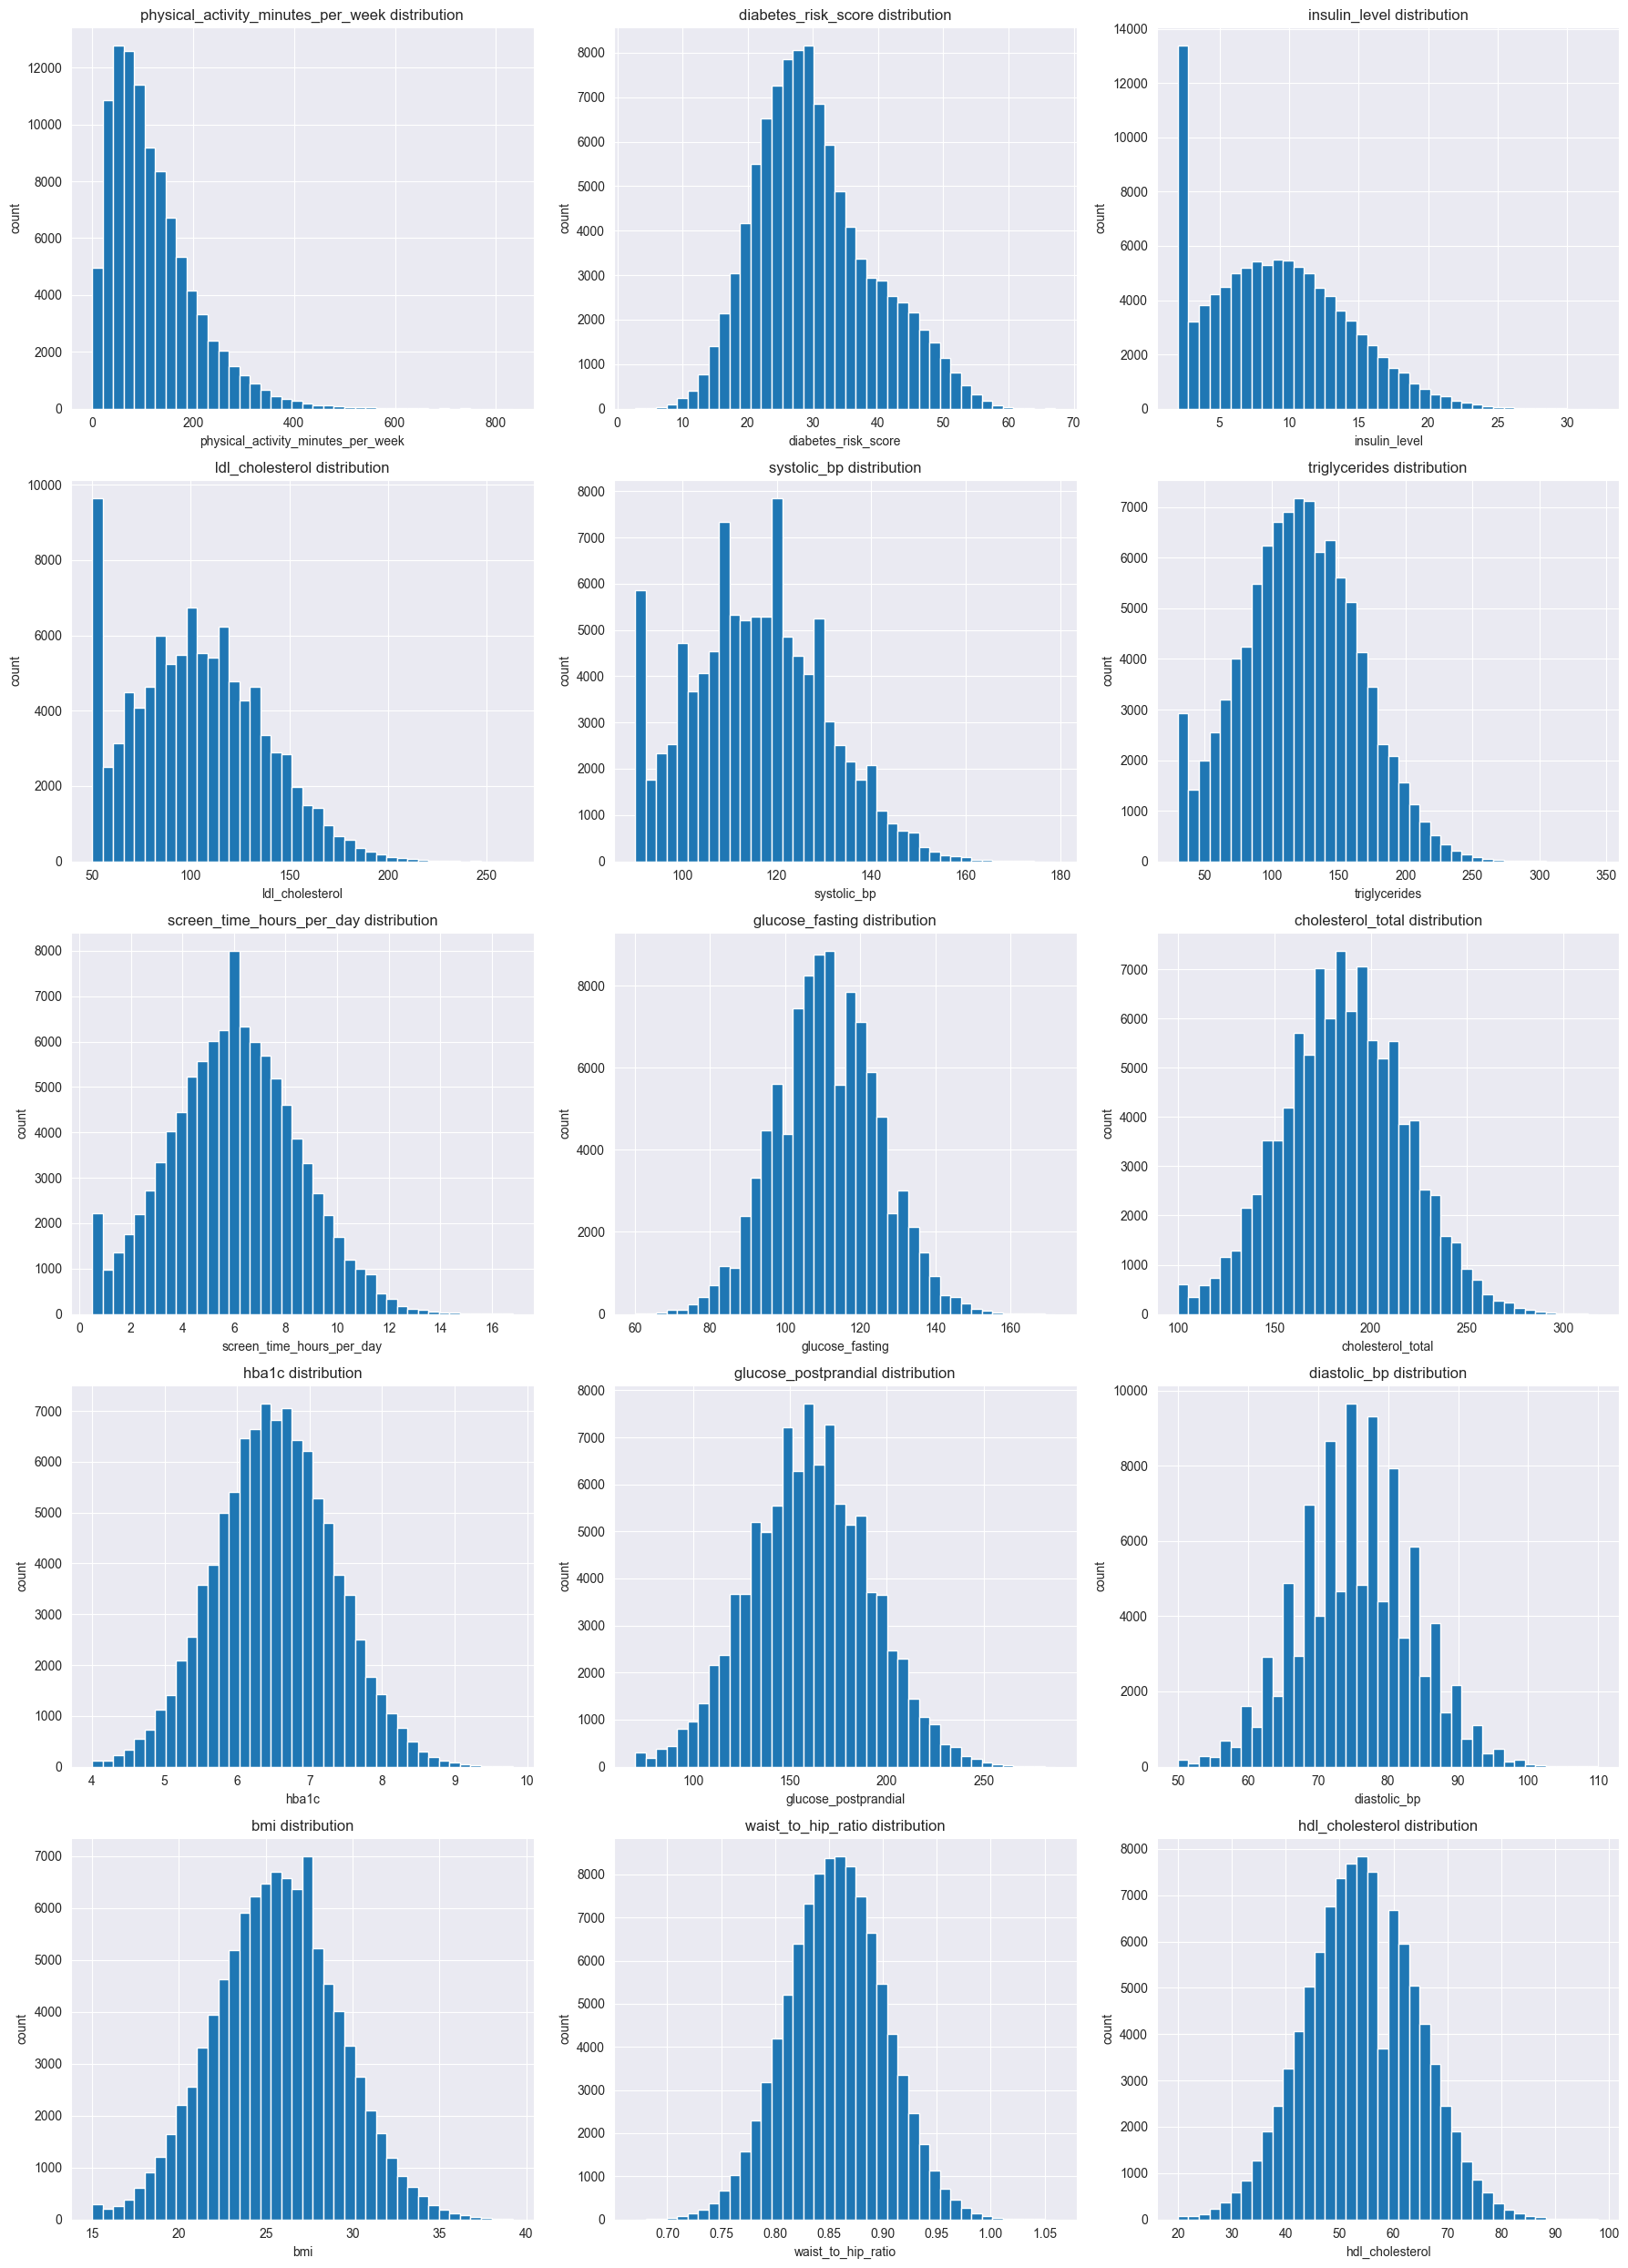

In [149]:
features = data[NUMERICAL_FEATURES].skew().sort_values(ascending=False).index[:15]
n = len(features)

cols = 3                     
rows = math.ceil(n / cols)   

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

for ax, feature in zip(axes, features):
    ax.hist(data[feature], bins=40)
    ax.set_title(f'{feature} distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel('count')

for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [150]:
data

,age,gender,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,alcohol_consumption_per_week_1,alcohol_consumption_per_week_2,alcohol_consumption_per_week_3,alcohol_consumption_per_week_4,alcohol_consumption_per_week_5,alcohol_consumption_per_week_6,alcohol_consumption_per_week_7,alcohol_consumption_per_week_8,alcohol_consumption_per_week_9,alcohol_consumption_per_week_10
0,58.0,1.0,215.0,5.7,7.9,7.9,0.0,0.0,0.0,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48.0,0.0,143.0,6.7,6.5,8.7,0.0,0.0,0.0,23.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.0,1.0,57.0,6.4,10.0,8.1,1.0,0.0,0.0,22.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,74.0,0.0,49.0,3.4,6.6,5.2,0.0,0.0,0.0,26.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46.0,1.0,109.0,7.2,7.4,5.0,0.0,0.0,0.0,21.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46.0,1.0,136.0,8.3,6.4,4.5,0.0,0.0,0.0,29.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,41.0,0.0,76.0,8.8,6.8,4.8,0.0,0.0,0.0,26.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,57.0,0.0,121.0,9.9,5.0,6.1,0.0,0.0,1.0,25.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,47.0,0.0,52.0,5.9,6.7,0.5,0.0,1.0,0.0,26.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After sorting the features by skewness, we observed that only one of them requires transformation: `physical_activity_minutes_per_week`. We will apply `log1p` to correct the 

distribution of its values. 

After obtaining the results, we will evaluate them and decide whether this is the appropriate approach or if another transformation method will be needed.

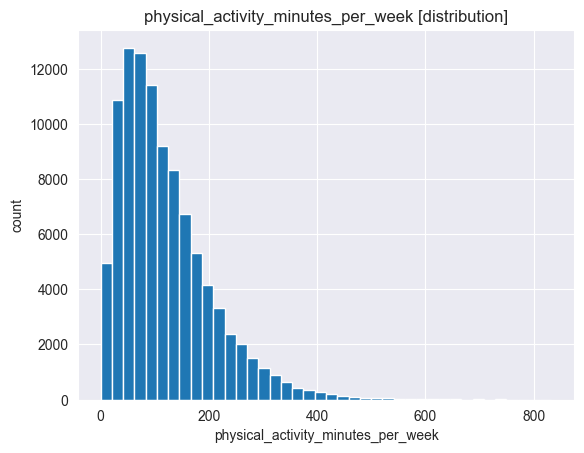

In [151]:
data_physical_activity_minutes_per_week = data['physical_activity_minutes_per_week']
plt.hist(data_physical_activity_minutes_per_week, bins=40)
plt.title('physical_activity_minutes_per_week [distribution]')
plt.xlabel('physical_activity_minutes_per_week')
plt.ylabel('count')
plt.show()

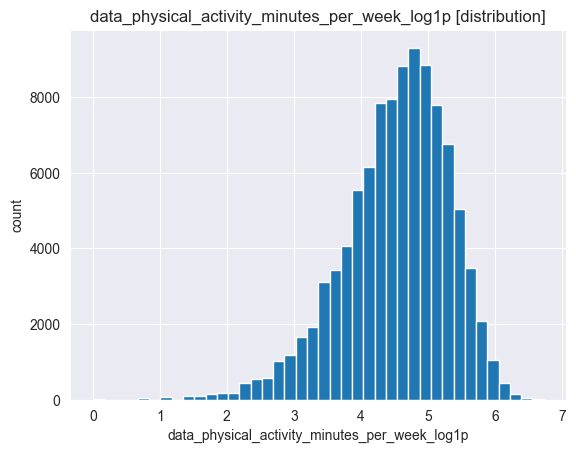

In [152]:
data_physical_activity_minutes_per_week_log1p = np.log1p(data_physical_activity_minutes_per_week)
plt.hist(data_physical_activity_minutes_per_week_log1p, bins=40)
plt.title('data_physical_activity_minutes_per_week_log1p [distribution]')
plt.xlabel('data_physical_activity_minutes_per_week_log1p')
plt.ylabel('count')
plt.show()

How `log1p` works:

$$log1p(x) = ln(1 + x)$$

In [169]:
why_log1p = pd.DataFrame({
    'normal values': [1, 10, 100, 1000, 10000],
    'diff_norm [10-1, 100-10, 1000-100...]': ['-', 9, 90, 900, 9000],
    'log1p': ['log1p(1)', 'log1p(10)', 'log1p(100)', 'log1p(1000)', 'log1p(10000)'],
    'result': [np.log1p(1), np.log1p(10), np.log1p(100), np.log1p(1000), np.log1p(10000)],
    'diff_log [10-1, 100-10, 1000-100...]': ['-', (2.397895 - 0.693147), (4.615121 - 2.397895), (6.908755 - 4.615121), (9.210440 - 6.908755)],
})
why_log1p

,normal values,"diff_norm [10-1, 100-10, 1000-100...]",log1p,result,"diff_log [10-1, 100-10, 1000-100...]"
0,1,-,log1p(1),0.693147,-
1,10,9,log1p(10),2.397895,1.704748
2,100,90,log1p(100),4.615121,2.217226
3,1000,900,log1p(1000),6.908755,2.293634
4,10000,9000,log1p(10000),9.210440,2.301685


$$ln(10)=x$$ if $$e^x=10$$ => $$log1p(10) = ln(10 + 1) = 2.397895$$

In [160]:
# log1p transformation
result_1 = data_physical_activity_minutes_per_week_log1p.skew()

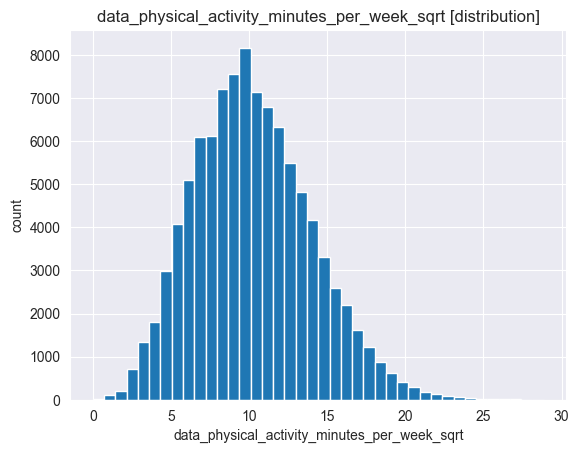

In [154]:
data_physical_activity_minutes_per_week_sqrt = np.sqrt(data_physical_activity_minutes_per_week)
plt.hist(data_physical_activity_minutes_per_week_sqrt, bins=40)
plt.title('data_physical_activity_minutes_per_week_sqrt [distribution]')
plt.xlabel('data_physical_activity_minutes_per_week_sqrt')
plt.ylabel('count')
plt.show()

In [155]:
# sqrt transformation
result_2 = data_physical_activity_minutes_per_week_sqrt.skew()

In [156]:
transformation_results = pd.DataFrame({
    'log1p': [result_1],
    'sqrt': [result_2]
}, index=['Transformation results']) 
transformation_results

,log1p,sqrt
Transformation results,-0.726857,0.391093


The final conclusion is that the `sqrt` transformation corrects the data and brings the skewness into the range of `0.00 – 0.50`. 

Based on these results, no further transformations are needed for this feature.

By using the `sqrt` transformation, we reduce the larger values more gently. As a result, the distribution does not shift as strongly as it does with `log1p`, making the transformation more stable and less aggressive.

In [157]:
data['physical_activity_minutes_per_week'] = np.sqrt(data['physical_activity_minutes_per_week'])
data

,age,gender,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,alcohol_consumption_per_week_1,alcohol_consumption_per_week_2,alcohol_consumption_per_week_3,alcohol_consumption_per_week_4,alcohol_consumption_per_week_5,alcohol_consumption_per_week_6,alcohol_consumption_per_week_7,alcohol_consumption_per_week_8,alcohol_consumption_per_week_9,alcohol_consumption_per_week_10
0,58.0,1.0,14.662878,5.7,7.9,7.9,0.0,0.0,0.0,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48.0,0.0,11.958261,6.7,6.5,8.7,0.0,0.0,0.0,23.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.0,1.0,7.549834,6.4,10.0,8.1,1.0,0.0,0.0,22.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,74.0,0.0,7.000000,3.4,6.6,5.2,0.0,0.0,0.0,26.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46.0,1.0,10.440307,7.2,7.4,5.0,0.0,0.0,0.0,21.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46.0,1.0,11.661904,8.3,6.4,4.5,0.0,0.0,0.0,29.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,41.0,0.0,8.717798,8.8,6.8,4.8,0.0,0.0,0.0,26.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,57.0,0.0,11.000000,9.9,5.0,6.1,0.0,0.0,1.0,25.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,47.0,0.0,7.211103,5.9,6.7,0.5,0.0,1.0,0.0,26.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


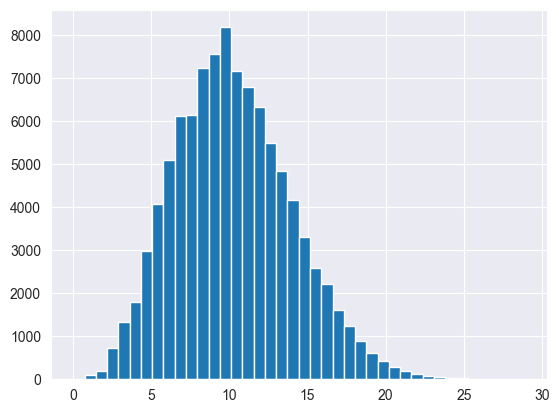

In [158]:
plt.hist(data['physical_activity_minutes_per_week'], bins=40)
plt.show()

In [159]:
data['physical_activity_minutes_per_week'].skew()

np.float64(0.3910933887647937)

Here we demonstrated how to measure the symmetry (skewness) of each feature and decided which of them should be transformed. We tested two approaches - `log1p` and `sqrt` = and explained the differences between these methods and when each one is appropriate.

It is important to note that feature transformations are not required for all models, but mainly for those that are sensitive to **skewness**, such as:

- Linear Regression

- Logistic Regression

- kNN

- SVM